<a href="https://colab.research.google.com/github/savioratharv/Compute_tasks/blob/main/Atharv_Patawar_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


In [2]:
#in dataset both the column has values in multiple of 10k

### Reading the dataset

In [3]:
#load dataset
df = pd.read_csv("Data1.txt", sep=",",header=None)

In [4]:
df

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [5]:
#describe the dataframe
df.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Scatter plot of Population vs Profit

In [6]:
#plot

Text(0, 0.5, 'Profit')

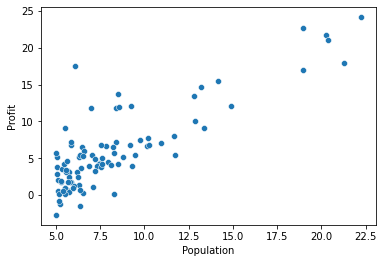

In [7]:
import seaborn as sns
sns.scatterplot(x=df[0],y=df[1],palette='mako')
plt.xlabel('Population')
plt.ylabel('Profit')

### Function to compute the cost function 

In [8]:
### Function to compute the cost function 

In [9]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

### Appending 1s to the front of the dataset

In [21]:
#insert column with 1s
df.insert(0,"ones",1)

In [22]:
df

,ones,0,1
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


### Set training data (X) and target variable (y)

In [23]:
cols = df.shape[1]
x = df.iloc[:,0:cols-1]
y = df.iloc[: , cols-1:cols]

### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [24]:
#converting X,y into numpy matrix
x_mat = np.matrix(x.values)
y_mat = np.matrix(y.values)

In [25]:
#converting theta into numpy matrix
# take initial values as [0,0] for theta
theta = np.matrix(np.array([0,0]))

print(theta)

[[0 0]]


In [41]:
print(theta.ravel())

[[0 0]]


In [43]:
print(computeCost(x_mat,y_mat,theta))

32.072733877455676


### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [56]:
def gradiantDescent(x,y,theta,alpha,n):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.ravel().shape[1]
    cost = np.zeros(n)

    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)
    for i in range(n):
        
        error = (x *theta.T)-y
        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
        for j in range (parameters):
        
        
            term = np.multiply(error , x[: , j])
            temp[0,j] = theta[0,j] - ((alpha /len(x)) *np.sum(term))
        
        theta = temp
        cost[i] = computeCost(x,y,theta)
    
    return theta , cost

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [57]:
# take alpha 0.01 
# iters=1000
alpha = 0.01
n = 1000


theta, cost = gradiantDescent(x_mat,y_mat,theta,alpha,n)

In [58]:
theta

matrix([[-3.87805118,  1.1912525 ]])




### Using Matplotlib library to visualize our solution using scatter plot

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

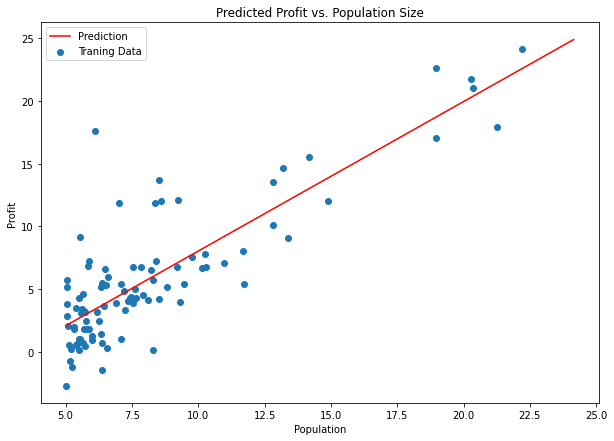

In [59]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(df[0].min(), df[1].max(), 100)  
f = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df[0], df[1], label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')


In [60]:
print(f)

[ 2.11025603  2.3403254   2.57039476  2.80046412  3.03053349  3.26060285
  3.49067221  3.72074158  3.95081094  4.1808803   4.41094967  4.64101903
  4.8710884   5.10115776  5.33122712  5.56129649  5.79136585  6.02143521
  6.25150458  6.48157394  6.7116433   6.94171267  7.17178203  7.40185139
  7.63192076  7.86199012  8.09205948  8.32212885  8.55219821  8.78226757
  9.01233694  9.2424063   9.47247567  9.70254503  9.93261439 10.16268376
 10.39275312 10.62282248 10.85289185 11.08296121 11.31303057 11.54309994
 11.7731693  12.00323866 12.23330803 12.46337739 12.69344675 12.92351612
 13.15358548 13.38365484 13.61372421 13.84379357 14.07386294 14.3039323
 14.53400166 14.76407103 14.99414039 15.22420975 15.45427912 15.68434848
 15.91441784 16.14448721 16.37455657 16.60462593 16.8346953  17.06476466
 17.29483402 17.52490339 17.75497275 17.98504211 18.21511148 18.44518084
 18.6752502  18.90531957 19.13538893 19.3654583  19.59552766 19.82559702
 20.05566639 20.28573575 20.51580511 20.74587448 20.

Text(0.5, 1.0, 'Error vs Training epoch')

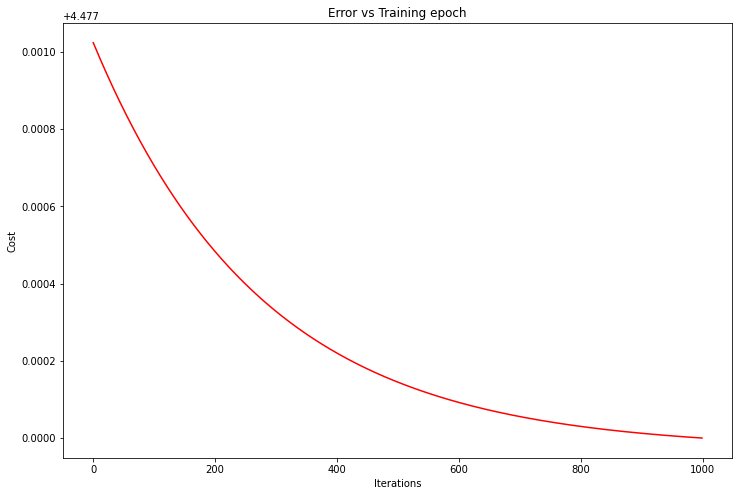

In [61]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(n), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [68]:
df

,ones,0,1
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [80]:
X=df.iloc[:,1]    #defining X and y
y=df.iloc[:,2]

In [82]:
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: 1, Length: 97, dtype: float64

In [85]:
x=np.array(X).reshape(-1,1) 

In [86]:
#fit the model
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [87]:
#predict the target values
y_pred=lr.predict(x)

In [89]:
#evalute the model
r2_score(y,y_pred)

0.7020315537841397

In [90]:
mean_squared_error(y,y_pred)

8.953942751950358